#### Working with Dates and Time Series Data

In [ ]:
import pandas as pd
df = pd.read_csv('assets/data/ETH_1h.csv')

In [266]:
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 03-PM,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 02-PM,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 01-PM,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12-PM,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11-AM,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


Date Formate, 
Using `pd.to_datetime` to convert it into date series
| Format | Meaning                              | Example                               |
| ------ | ------------------------------------ | ------------------------------------- |
| `%y`   | Year (two digits, 00–99)             | `25` → means year **2025**            |
| `%Y`   | Year (four digits)                   | `2025`                                |
| `%m`   | Month (two digits, 01–12)            | `11` → November                       |
| `%d`   | Day of the month (two digits, 01–31) | `01` → the 1st                        |
| `%I`   | Hour in **12-hour format** (01–12)   | `07` → 7 AM or 7 PM (depends on `%p`) |
| `%H`   | Hour in **24-hour format** (00–23)   | `19` → 7 PM                           |
| `%M`   | Minute (00–59)                       | `05` → 5 minutes                      |
| `%S`   | Second (00–59)                       | `42` → 42 seconds                     |
| `%p`   | AM / PM indicator                    | `AM` or `PM`                          |


In [267]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [268]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')
df['Date'].head(5)

0   2020-03-13 20:00:00
1   2020-03-13 19:00:00
2   2020-03-13 18:00:00
3   2020-03-13 17:00:00
4   2020-03-13 16:00:00
Name: Date, dtype: datetime64[ns]

| Property          | Example      | Meaning                       |
| ----------------- | ------------ | ----------------------------- |
| `dt.year`         | `2025`       | year                          |
| `dt.month`        | `11`         | month number                  |
| `dt.day`          | `1`          | day of month                  |
| `dt.day_name()`   | `'Saturday'` | weekday name                  |
| `dt.weekday`      | `5`          | weekday number (Mon=0, Sun=6) |
| `dt.is_leap_year` | `True/False` | check leap year               |

##### Notice the difference between a function and a property

In [269]:
df.loc[0, 'Date'].day_name()

'Friday'

In [270]:
df.loc[0, 'Date'].is_leap_year

True

Using max, min and substraction function to access the range

In [271]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

Filter specific time range

In [272]:
filt = (df['Date'].dt.year <= 2019) & (df['Date'].dt.year >= 2018)
df[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01


In [273]:
df['Date'].dtype

dtype('<M8[ns]')

Notice, you can also set date to index, and then access via `loc[index]`, however, you have to sort the index into a monotonic order first, then you can use slice 

In [274]:
df = df.set_index('Date')
df = df.sort_index()
df.loc['2019-03': '2020-03']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-03-01 00:00:00,ETHUSD,134.48,135.27,134.48,135.02,274651.02
2019-03-01 01:00:00,ETHUSD,135.02,135.06,134.75,135.01,245513.97
2019-03-01 02:00:00,ETHUSD,135.01,135.20,134.86,134.97,222565.71
2019-03-01 03:00:00,ETHUSD,134.97,135.79,134.90,135.59,292562.81
2019-03-01 04:00:00,ETHUSD,135.59,135.60,134.98,135.51,325128.14
...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [275]:
df.loc['2019-03': '2020-03']['Close'].mean()

np.float64(192.51131419773452)

We can use resample to play the time series

Notice in 2018, lowest price for ETH is 80.6

In [276]:
test = df.resample('YE').agg({
    'Open': 'first', 
    'High': 'max', 
    'Low': 'min', 
    'Close': 'last',
    'Volume': 'sum'
})
test

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-31,279.98,875.00,130.26,741.27,1.298966e+10
2018-12-31,741.27,1419.96,80.60,130.53,2.394412e+10
2019-12-31,130.53,364.49,100.15,128.54,8.199368e+09
2020-12-31,128.54,290.00,90.00,128.71,2.476100e+09


Using idxmin(), check the index of the minimum value, access the time, 2018-12-14

In [277]:
df.loc['2018'].idxmin()

Symbol   2018-01-01 00:00:00
Open     2018-12-15 16:00:00
High     2018-12-15 16:00:00
Low      2018-12-14 21:00:00
Close    2018-12-15 15:00:00
Volume   2018-02-01 05:00:00
dtype: datetime64[ns]

It's true; Now ETH hits 3900 + , so bad did not buy any of these coins..

![]( assets/images/eth_2018.png "Optional Title")

<Axes: xlabel='Date'>

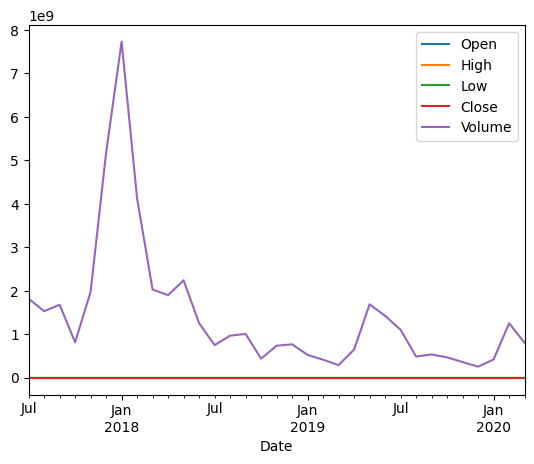

In [278]:
%matplotlib inline
month = df.resample('ME').agg({
    'Open': 'first', 
    'High': 'max', 
    'Low': 'min', 
    'Close': 'last',
    'Volume': 'sum'
})
month.plot()